In [1]:
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

paragraph = """
My favorite topic is exploring the vast expanse of the universe.  The sheer scale of galaxies, nebulae, and distant stars continually amazes me.  Learning about celestial mechanics and the origins of our solar system never gets old.  I find it fascinating to consider the possibility of extraterrestrial life and the potential for human exploration beyond Earth.  The mysteries hidden within space are endless, and the quest for knowledge about them is an exciting adventure. Space travel is one day within our grasp.
"""

cleaned_paragraph = re.sub(r'[^\w\s]', '', paragraph).lower()

words = word_tokenize(cleaned_paragraph)
sentences = sent_tokenize(paragraph)

split_words = cleaned_paragraph.split()
print("Difference between split and word_tokenize:")
print(f"Split: {split_words[:10]}")
print(f"word_tokenize: {words[:10]}")

stop_words = set(stopwords.words('english'))
filtered_words = [w for w in words if not w in stop_words]

word_freq = FreqDist(filtered_words)
print("\nWord Frequency Distribution (excluding stopwords):")
word_freq.most_common(10) # Display top 10 most frequent words

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/karrinsatijaa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/karrinsatijaa/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/karrinsatijaa/nltk_data...


Difference between split and word_tokenize:
Split: ['my', 'favorite', 'topic', 'is', 'exploring', 'the', 'vast', 'expanse', 'of', 'the']
word_tokenize: ['my', 'favorite', 'topic', 'is', 'exploring', 'the', 'vast', 'expanse', 'of', 'the']

Word Frequency Distribution (excluding stopwords):


[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


[('within', 2),
 ('space', 2),
 ('favorite', 1),
 ('topic', 1),
 ('exploring', 1),
 ('vast', 1),
 ('expanse', 1),
 ('universe', 1),
 ('sheer', 1),
 ('scale', 1)]

In [3]:
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

paragraph = """
My favorite topic is exploring the vast expanse of the universe.  The sheer scale of galaxies, nebulae, and distant stars continually amazes me.  Learning about celestial mechanics and the origins of our solar system never gets old.  I find it fascinating to consider the possibility of extraterrestrial life and the potential for human exploration beyond Earth.  The mysteries hidden within space are endless, and the quest for knowledge about them is an exciting adventure. Space travel is one day within our grasp.
"""

words = re.findall(r'\b[a-zA-Z]+\b', paragraph)

stop_words = set(stopwords.words('english'))
filtered_words = [w for w in words if not w.lower() in stop_words]

stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(w) for w in filtered_words]

lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(w) for w in filtered_words]

print("Stemmed words:", stemmed_words)
print("Lemmatized words:", lemmatized_words)

print("\nComparison:")

print(f"'exploring' stemmed to: {stemmer.stem('exploring')}")
print(f"'exploring' lemmatized to: {lemmatizer.lemmatize('exploring')}")

print(f"'amazes' stemmed to: {stemmer.stem('amazes')}")
print(f"'amazes' lemmatized to: {lemmatizer.lemmatize('amazes')}")

print(f"'origins' stemmed to: {stemmer.stem('origins')}")
print(f"'origins' lemmatized to: {lemmatizer.lemmatize('origins')}")

print("\nExplanation:")
print("Stemming reduces words to their root form by removing prefixes and suffixes.  It's faster and simpler but may produce non-words or less accurate results.")
print("Lemmatization takes into account the word's context and part of speech, producing valid words.  It's more accurate but computationally more expensive.")
print("In general, prefer Lemmatization when accuracy is critical or you want real words in your output.  Stemming is faster and sufficient for tasks less sensitive to slight inaccuracies.")
print("Providing a part of speech tag (POS) to the lemmatizer greatly improves accuracy.")


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/karrinsatijaa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/karrinsatijaa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/karrinsatijaa/nltk_data...


Stemmed words: ['favorit', 'topic', 'explor', 'vast', 'expans', 'univers', 'sheer', 'scale', 'galaxi', 'nebula', 'distant', 'star', 'continu', 'amaz', 'learn', 'celesti', 'mechan', 'origin', 'solar', 'system', 'never', 'get', 'old', 'find', 'fascin', 'consid', 'possibl', 'extraterrestri', 'life', 'potenti', 'human', 'explor', 'beyond', 'earth', 'mysteri', 'hidden', 'within', 'space', 'endless', 'quest', 'knowledg', 'excit', 'adventur', 'space', 'travel', 'one', 'day', 'within', 'grasp']
Lemmatized words: ['favorite', 'topic', 'exploring', 'vast', 'expanse', 'universe', 'sheer', 'scale', 'galaxy', 'nebula', 'distant', 'star', 'continually', 'amazes', 'Learning', 'celestial', 'mechanic', 'origin', 'solar', 'system', 'never', 'get', 'old', 'find', 'fascinating', 'consider', 'possibility', 'extraterrestrial', 'life', 'potential', 'human', 'exploration', 'beyond', 'Earth', 'mystery', 'hidden', 'within', 'space', 'endless', 'quest', 'knowledge', 'exciting', 'adventure', 'Space', 'travel', 'o

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

texts = [
    "The quick brown fox jumps over the lazy dog.",
    "The dog barked at the mailman.",
    "The fox and the dog are friends."
]

vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(texts)
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print("Bag of Words Representation:\n", bow_df)

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print("\nTF-IDF Representation:\n", tfidf_df)

for i in range(len(texts)):
  top_keywords = tfidf_df.iloc[i].sort_values(ascending=False).head(3).index.tolist()
  print(f"\nTop 3 keywords for text {i+1}: {top_keywords}")
  print(f"Interpretation for text {i+1}:")
  for keyword in top_keywords:
    print(f"  - {keyword}: This keyword's high TF-IDF score suggests it's important in this document compared to the corpus.")


Bag of Words Representation:
    and  are  at  barked  brown  dog  fox  friends  jumps  lazy  mailman  over  \
0    0    0   0       0      1    1    1        0      1     1        0     1   
1    0    0   1       1      0    1    0        0      0     0        1     0   
2    1    1   0       0      0    1    1        1      0     0        0     0   

   quick  the  
0      1    2  
1      0    2  
2      0    2  

TF-IDF Representation:
         and       are        at    barked     brown       dog       fox  \
0  0.000000  0.000000  0.000000  0.000000  0.369547  0.218260  0.281050   
1  0.000000  0.000000  0.459115  0.459115  0.000000  0.271161  0.000000   
2  0.433452  0.433452  0.000000  0.000000  0.000000  0.256004  0.329651   

    friends     jumps      lazy   mailman      over     quick       the  
0  0.000000  0.369547  0.369547  0.000000  0.369547  0.369547  0.436520  
1  0.000000  0.000000  0.000000  0.459115  0.000000  0.000000  0.542321  
2  0.433452  0.000000  0.000000  

In [9]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text).lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    return tokens

def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union else 0

text1 = """AI is rapidly evolving, impacting various sectors.
Machine learning algorithms are at the core, enabling systems to learn from data.
AI-powered solutions offer automation, improved decision-making, and personalization."""

text2 = """Blockchain technology provides a secure and transparent ledger.
Cryptocurrencies like Bitcoin utilize blockchain.
Decentralized systems built on blockchain enhance trust and efficiency."""


tokens1 = preprocess_text(text1)
tokens2 = preprocess_text(text2)

jaccard_sim = jaccard_similarity(set(tokens1), set(tokens2))
print(f"Jaccard Similarity: {jaccard_sim}")

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform([text1, text2])
cosine_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])[0][0]
print(f"Cosine Similarity: {cosine_sim}")

print("\nAnalysis:")
print("In this case, Jaccard similarity provides better insights. ")
print("Because the two texts discuss entirely different concepts (AI and Blockchain),")
print("a low Jaccard score accurately reflects their lack of shared vocabulary.")
print("Cosine Similarity, while considering word frequencies, might be misleading here")
print("as some common words could inflate the score despite the topic difference.")


Jaccard Similarity: 0.027777777777777776
Cosine Similarity: 0.05294612792698644

Analysis:
In this case, Jaccard similarity provides better insights. 
Because the two texts discuss entirely different concepts (AI and Blockchain),
a low Jaccard score accurately reflects their lack of shared vocabulary.
Cosine Similarity, while considering word frequencies, might be misleading here
as some common words could inflate the score despite the topic difference.


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/karrinsatijaa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/karrinsatijaa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Review: This product is absolutely amazing! I love it.
  Polarity: 0.8705
  Sentiment: Positive

Review: Terrible experience, would not recommend.
  Polarity: -0.6381
  Sentiment: Negative

Review: It's okay, nothing special.
  Polarity: -0.092
  Sentiment: Negative

Review: I'm very happy with this purchase.
  Polarity: 0.6115
  Sentiment: Positive

Review: The service was quite poor.
  Polarity: -0.5256
  Sentiment: Negative

Review: This is a great product, highly recommended!
  Polarity: 0.7569
  Sentiment: Positive



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/karrinsatijaa/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/karrinsatijaa/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


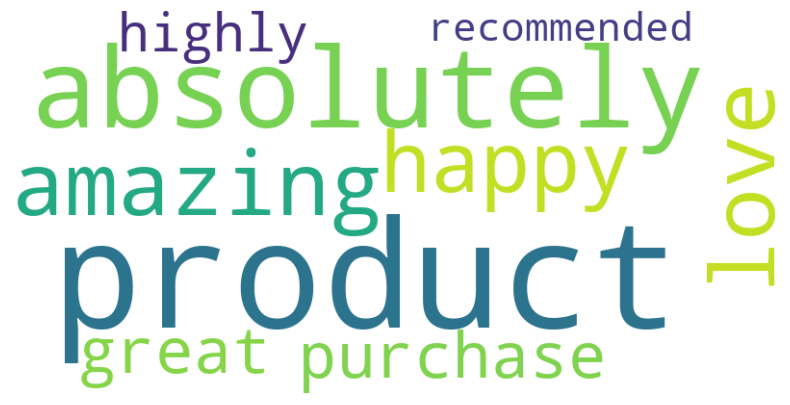

In [13]:
!pip install textblob
!pip install vaderSentiment
!pip install wordcloud

import nltk
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')

from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

reviews = [
    "This product is absolutely amazing! I love it.",
    "Terrible experience, would not recommend.",
    "It's okay, nothing special.",
    "I'm very happy with this purchase.",
    "The service was quite poor.",
    "This is a great product, highly recommended!"
]


def analyze_sentiment(review):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)

    if scores['compound'] >= 0.05:
        sentiment = "Positive"
    elif scores['compound'] <= -0.05:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"

    return scores, sentiment


positive_reviews = []
for review in reviews:
    scores, sentiment = analyze_sentiment(review)
    print(f"Review: {review}")
    print(f"  Polarity: {scores['compound']}")
    print(f"  Sentiment: {sentiment}\n")
    if sentiment == "Positive":
        positive_reviews.append(review)

if positive_reviews:
    text = " ".join(positive_reviews)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()



In [17]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

paragraph = """My favorite topic is exploring the vast expanse of the universe.  The sheer scale of galaxies, nebulae, and distant stars continually amazes me.  Learning about celestial mechanics and the origins of our solar system never gets old.  I find it fascinating to consider the possibility of extraterrestrial life and the potential for human exploration beyond Earth.  The mysteries hidden within space are endless, and the quest for knowledge about them is an exciting adventure. Space travel is one day within our grasp."""

tokenizer = Tokenizer()
tokenizer.fit_on_texts([paragraph])
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for line in paragraph.split('.'): # Splitting into sentences
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
label = np.array(label)

model = Sequential()
model.add(Embedding(total_words, 10, input_length=max_sequence_len-1))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(predictors, label, epochs=100, verbose=0)

seed_word = "universe"
next_words = 3
for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_word])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predicted = model.predict(token_list, verbose=0)
  output_word = ""
  for word, index in tokenizer.word_index.items():
      if index == np.argmax(predicted):
          output_word = word
          break
  seed_word += " " + output_word
seed_word


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


'universe is is is'